**Praktikum Komputasi Big Data Pertemuan 1**
<br>
Nama : Faris Rasyid
<br>
NPM : 50421483
<br>
Kelas : 2IA22

##SOAL

# Instruksi Tugas Praktikum FIKTI dan FTI

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean
3. Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean
4. Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
5. Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
6. Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan. 


# 1) Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)

In [ ]:
# import libraries
import pandas as pd
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [ ]:
# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [ ]:
## Melihat 5 baris awal dari dataset yang digunakan
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2) Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean

In [ ]:
datacorr1 = pd.DataFrame({"compactness_mean":data["compactness_mean"],"concavity_mean":data["concavity_mean"]})

In [ ]:
datacorr1.corr()

,compactness_mean,concavity_mean
compactness_mean,1.000000,0.883121
concavity_mean,0.883121,1.000000


# PENJELASAN

diagram korelasi antara variable compactness_mean dengan concavity_mean menunjukan bahwa kedua diagram korelasi nya positif satu sama lain

memiliki korelasi antara compactness_mean dengan concavity_mean dengan nilai 0.8 atau 80%

# 3) Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean

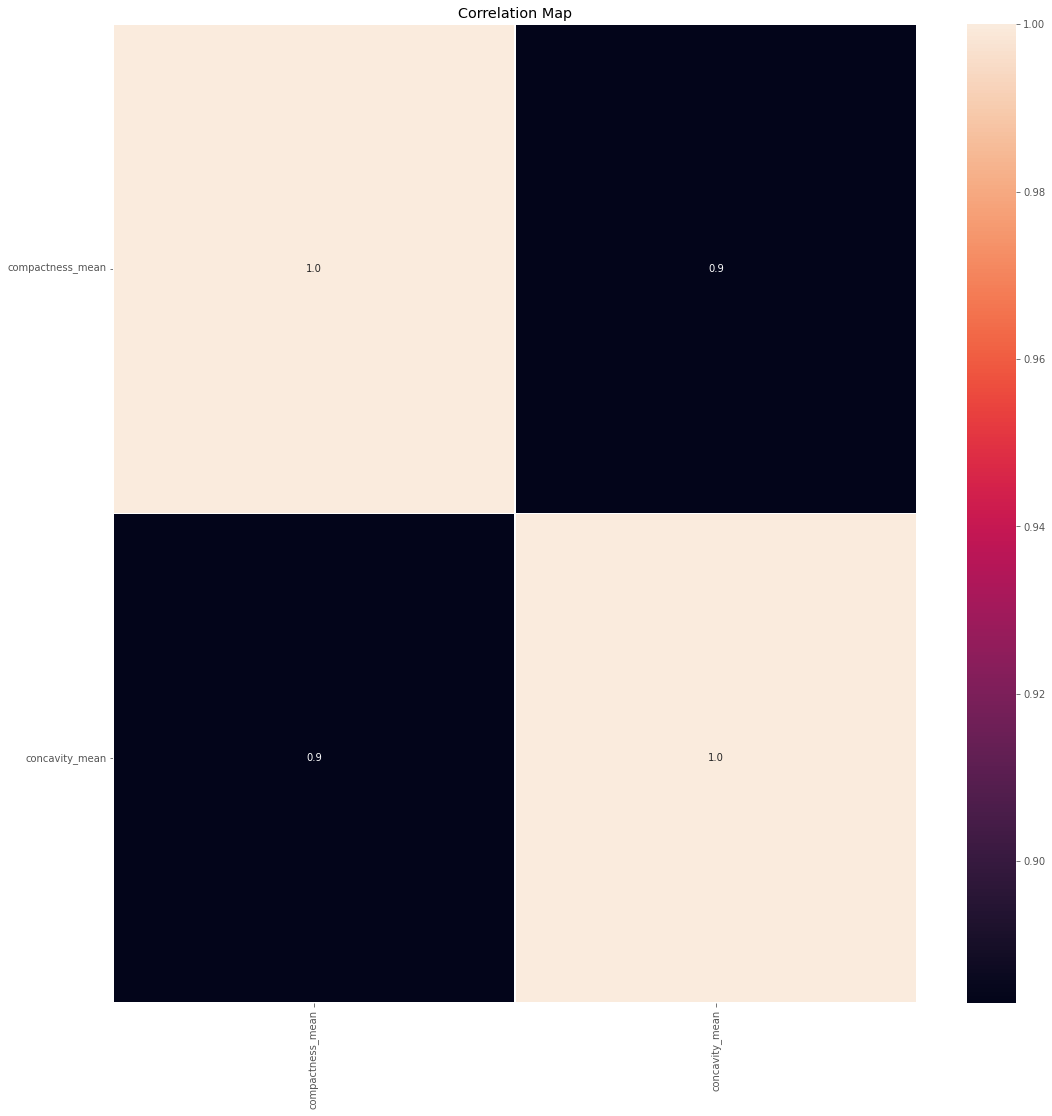

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(datacorr1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

<Figure size 1800x1440 with 0 Axes>

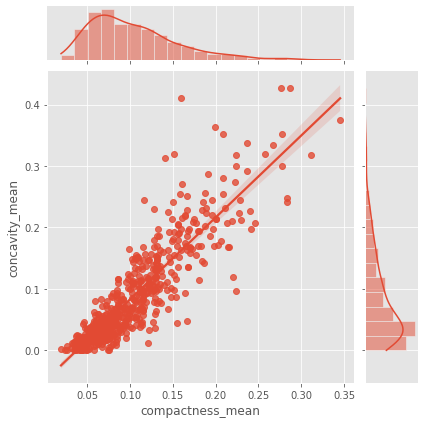

In [ ]:
plt.figure(figsize = (25,20))
sns.jointplot(data.compactness_mean,data.concavity_mean,kind="reg")
plt.show()

#PENJELASAN

terdapat grafik yang menggambarkan sebuah diagram korelasi yang berupa grafik dan blok lalu nanti angak tersebut akan di hitung di nomor berikut nya ini merupakan tampilan visual dari grafik diagram korelasi

# 4) Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [ ]:
cp.cov(data.compactness_mean,data.concavity_mean)
print("Covariance diantara compactness mean dan concavity mean: ",data.compactness_mean.cov(data.concavity_mean))

Covariance diantara compactness mean dan concavity mean:  0.003718134921780181


# PENJELASAN

nilai covariance tidak 0 berarti dua kolom ini bukan ortogonal dan tidak negatif berarti menunjuk ke arah yang sama

# 5) Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [ ]:
p1 = data.loc[:,["compactness_mean","concavity_mean"]].corr(method= "pearson")
p2 = data.compactness_mean.cov(data.concavity_mean)/(data.compactness_mean.std()*data.concavity_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  concavity_mean
compactness_mean          1.000000        0.883121
concavity_mean            0.883121        1.000000
Pearson correlation:  0.8831206701772506


# PENJELASAN

Pearson korelasi antara compactness dan concavity berkorelasi positif dikarenakan nilai korelasinya 0.88 angka yang dapat menunjukan korelasi yang positif

# 6) Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan.

In [ ]:
statistic, p_value = stats.ttest_rel(data.compactness_mean,data.concavity_mean)
print('p-value adalah: ',p_value)

p-value adalah:  4.2923131591850576e-18


#PENJELASAN

p-value rendah, makadari itu pengaruh tersebut dikatakan signifikan secara statistik yang artinya tidak mungkin terjadi secara kebetulan. Nilainya mendekati 0 berarti yang berarti kedua data ini sangat berpengaruh dan dapat mengabaikain hipotesis menjadi 0